# 1. Simple Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
 # STEP2: IMPORTING THE DATASET
dataset = pd.read_csv('SAT to GPA.csv')
dataset.head()

,SAT Score,GPA
0,1600,4.0
1,1593,4.0
2,1587,4.0
3,1580,4.0
4,1573,4.0


The shape of the Dataset
(181, 2)
 
The staistical Inference of the dataset
         SAT Score         GPA
count   181.000000  181.000000
mean   1000.000000    2.617901
std     349.293573    1.559243
min     400.000000    0.000000
25%     700.000000    1.390000
50%    1000.000000    3.370000
75%    1300.000000    3.970000
max    1600.000000    4.000000
 
Datatypes in the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
SAT Score    181 non-null int64
GPA          181 non-null float64
dtypes: float64(1), int64(1)
memory usage: 3.0 KB
None
 


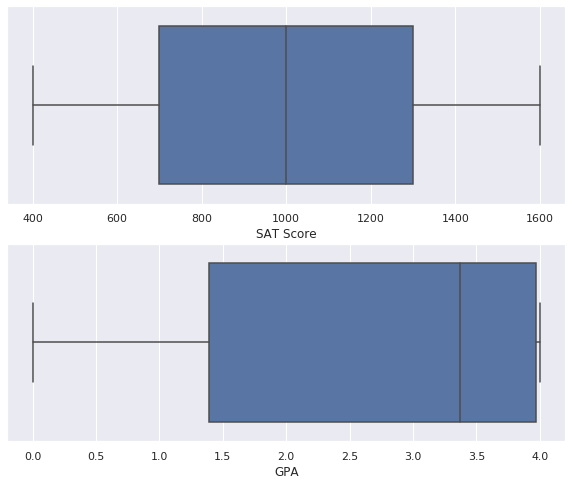

In [ ]:
# Step3 EDA
# STEP3: EXPLORATORY DATA ANALYSIS
print("The shape of the Dataset")
print(dataset.shape)
print(" ")

print("The staistical Inference of the dataset")
print(dataset.describe())
print(" ")

print("Datatypes in the dataset")
print(dataset.info())
print(" ")

fig, ax = plt.subplots(2,1, figsize=(10,8))

sns.boxplot(ax= ax[0],x=dataset['SAT Score'])
sns.boxplot(ax=ax[1],x=dataset['GPA'])
plt.show()

In [ ]:
# STEP4: DATA PREPROCESSING
# duplicate data
dups=dataset.duplicated() # not all boolean values visible
print('number of duplicate rows = %d' % (dups.sum())) # alternatively sum(dups)
dataset.drop_duplicates(inplace=True) # drop duplicates

# missing values
dataset.isnull().sum() # no missing values
# in case there are,  impute them

number of duplicate rows = 0


SAT Score    0
GPA          0
dtype: int64

In [ ]:
# no categorical data. In case there is, then you have to encode categorical data

# STEP5: SEGGREGATING THE FEATURE MATRIX AND TARGET
X = dataset.iloc[:, :-1] #Take all the rows and all the columns except last one
y = dataset.iloc[:, -1] #Take all the rows and the last column as the result

#train=dataset.iloc

In [ ]:
# STEP6: TRAIN (X_train & Y_train)- TEST (X test & y_test)SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # ft returns 4 subsets

# ideally do cross-validation



# dimensions of train and test data
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('train_labels', y_train.shape)
print('test_labels', y_test.shape)

# description of train and test data
#X_train.describe()
#X_test.describe()
#y_train.describe()
#y_test.describe()

X_train (144, 1)
X_test (37, 1)
train_labels (144,)
test_labels (37,)


In [ ]:
## STEP7: BUILDING SLR MODEL
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # object regressor is created
regressor.fit(X_train, y_train) # Fitting Linear Regression to the Training set

# Regression coefficients
print('slope:', regressor.coef_)
print("y-intercept: ", regressor.intercept_)
# reg model is GPA = m SAT + c

slope: [0.00410457]
y-intercept:  -1.4661272685831253


In [ ]:
# STEP8: PREDICTING ON TEST DATA
y_pred = regressor.predict(X_test)

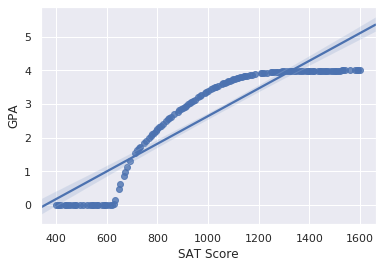

In [ ]:
# STEP9: DATA VISUALIZATION

# Regression plot for training set results
dataframe_training = pd.DataFrame() # creating empty dataframe
dataframe_training['SAT Score'] = X_train['SAT Score'] # adding SAT to this dataframe
dataframe_training['GPA'] = y_train # adding GPA to this dataframe
ax = sns.regplot(x="SAT Score", y="GPA", data= dataframe_training) # shadow line around regression line is CI

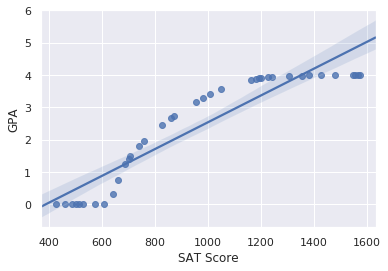

In [ ]:
# Regression plot for test set results
dataframe_test = pd.DataFrame()
dataframe_test['SAT Score'] = X_test['SAT Score']
dataframe_test['GPA'] = y_test
ax = sns.regplot(x="SAT Score", y="GPA", data= dataframe_test)

In [ ]:
# STEP10: MODEL EVALUATION: MSE, R2
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred))) # comparing y_pred with y_test
print("R square: {}".format(r2_score(y_test, y_pred)))


Mean squared error: 0.3566707857170987
R square: 0.86422313614636


# 2. Multiple Linear Regression

In [ ]:
import pandas as pd
#importing datasets
data_set= pd.read_csv('advertising.csv')

In [ ]:
data_set.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
#Extracting Independent and dependent Variable
x= data_set.iloc[:, :-1].values
y= data_set.iloc[:, 3].values

In [ ]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

In [ ]:
#Fitting the MLR model to the training set:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Predicting the Test set result;
y_pred= regressor.predict(x_test)

In [ ]:
print('Train Score: ', regressor.score(x_train, y_train))
print('Test Score: ', regressor.score(x_test, y_test))

Train Score:  0.9132130769530317
Test Score:  0.8645053923967725


In [ ]:
#  MSE, R2
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred))) # comparing y_pred with y_test
print("R square: {}".format(r2_score(y_test, y_pred)))

Mean squared error: 4.522552562041289
R square: 0.8645053923967725


In [ ]:
# Regression coefficients
print('slope:', regressor.coef_)
print("y-intercept: ", regressor.intercept_)

slope: [ 0.05368006  0.11152624 -0.00351166]
y-intercept:  4.7732052032698356


# 3.Polynomial Regression

In [ ]:
#importing datasets
data_set= pd.read_csv('Salary_Data.csv')
data_set.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
X = dataset.iloc[:, :-1] #Take all the rows and all the columns except last one
y = dataset.iloc[:, -1] #Take all the rows and the last column as the result

In [ ]:
# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

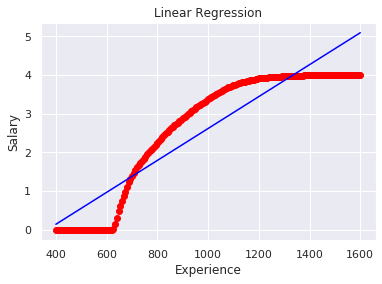

In [ ]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

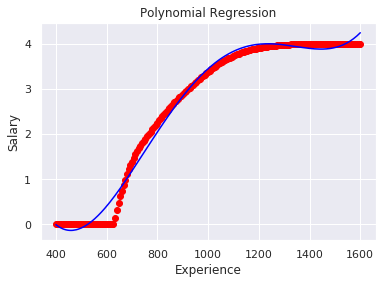

In [ ]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Regression coefficients
print('slope:', lin_reg_2.coef_)
print("y-intercept: ", lin_reg_2.intercept_)

slope: [ 0.00000000e+00 -7.23291940e-02  1.33091714e-04 -9.23545979e-08
  2.20576751e-11]
y-intercept:  12.978447291193067


In [ ]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

In [ ]:
#Fit polynomial model
lin_reg_2.fit(x_train, y_train)
#Predicting the Test set result;
y_pred_poly= lin_reg_2.predict(x_test)

In [ ]:
#  MSE, R2
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred_poly))) # comparing y_pred with y_test
print("R square: {}".format(r2_score(y_test, y_pred_poly)))

Mean squared error: 0.3566707857170987
R square: 0.86422313614636


# 4.Logistic Regression

In [ ]:
#importing datasets
data_set= pd.read_csv('Iris.csv')
data_set.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [ ]:
X = data_set.iloc[:, :-1]
y =data_set.iloc[:, -1]

# Label Encoder

In [ ]:
from sklearn import preprocessing
le.fit(y)
label_Iris = le.transform(y)


In [ ]:
from sklearn.linear_model import LogisticRegression
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9333333333333333


Do the comparison of regression techniques

In [ ]:
#importing datasets
data_set= pd.read_csv('Toyota.csv')
data_set.head(2)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165


In [ ]:
label = data_set['FuelType']
from sklearn import preprocessing
le.fit(label)
label_le = le.transform(label)


In [ ]:
data_new_set = data_set.copy()
data_new_set.drop(['FuelType'],inplace =True, axis=1)

In [ ]:
data_new_set.head(1)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,90,1,0,2000,3,1165


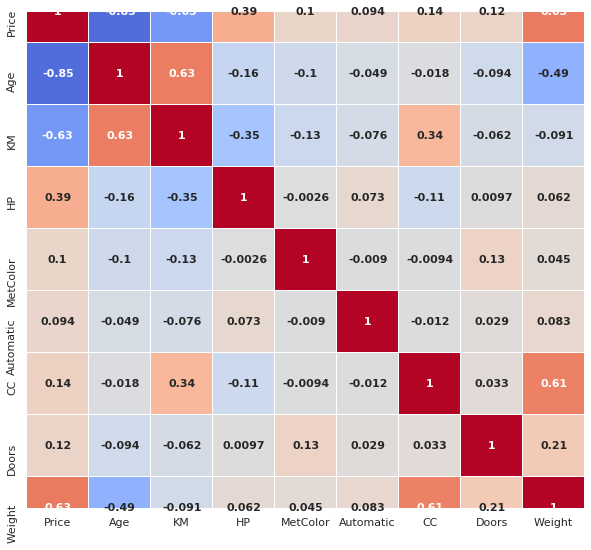

In [ ]:
# form correlation matrix
matrix = data_new_set.corr()
matrix
fig, ax = plt.subplots(1,1, figsize=(10,10))
#plotting the heatmap for correlation
ax = sns.heatmap(data_new_set.corr(), annot=True,linewidths=.5,cmap= 'coolwarm',vmin=-1, vmax=1,
                 annot_kws={'fontsize':11, 'fontweight':'bold'},square=True,fmt='.2g',cbar=False)
plt.show()